In [16]:
import pandas as pd

log1 = pd.read_csv('Qwen2b-Robot-Arm-Unsloth/2B/V4/log.csv')
log1.index = log1['step']
log1 = log1.drop(columns=['step'])
log1

,loss,grad_norm,learning_rate,epoch,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
step,,,,,,,,,,,,,
10,2.0410,0.983779,0.000498,0.022701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,0.5227,0.943825,0.000494,0.045403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,0.3237,1.274211,0.000490,0.068104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0.2732,1.074274,0.000487,0.090806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,0.2525,0.293317,0.000483,0.113507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,0.0987,0.142748,0.000008,2.948922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,NaN,NaN,NaN,2.948922,0.106158,219.4485,0.911,0.456,NaN,NaN,NaN,NaN,NaN
1310,0.1046,0.175932,0.000004,2.971623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
train_loss = log1.groupby('step')[['loss', 'grad_norm', 'learning_rate']].sum()
train_loss

,loss,grad_norm,learning_rate
step,,,
10,2.0410,0.983779,0.000498
20,0.5227,0.943825,0.000494
30,0.3237,1.274211,0.000490
40,0.2732,1.074274,0.000487
50,0.2525,0.293317,0.000483
...,...,...,...
1280,0.1015,0.161840,0.000015
1290,0.1054,0.158332,0.000011
1300,0.0987,0.142748,0.000008


In [18]:
train_loss = log1.groupby('step')[['loss', 'grad_norm', 'learning_rate']].sum()

val_loss = log1.groupby('step')[['eval_loss']].sum()
val_loss = val_loss[val_loss['eval_loss'] != 0]

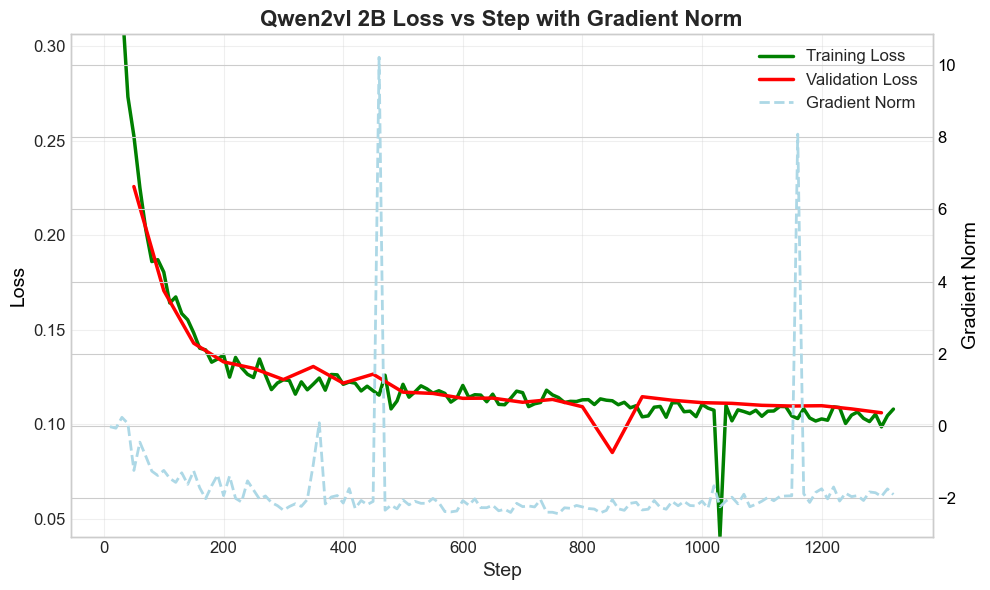

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Training and Validation Loss on the left y-axis
ax1.plot(train_loss.index, train_loss['loss'], color='green', linewidth=2.5, label='Training Loss')
ax1.plot(val_loss.index, val_loss['eval_loss'], color='red', linewidth=2.5, label='Validation Loss')

# Labeling for left y-axis
ax1.set_xlabel('Step', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14, color='black')
ax1.set_title('Qwen2vl 2B Loss vs Step with Gradient Norm', fontsize=16, fontweight='bold')

# Set y-limits for left axis
y_min = train_loss['loss'].min()
y_max = train_loss['loss'].max() * 0.15
ax1.set_ylim(y_min, y_max)

# Tick customization
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(alpha=0.3)

# Create the secondary y-axis (right side)
ax2 = ax1.twinx()
ax2.plot(train_loss.index, np.log(train_loss['grad_norm']), color='lightblue', linewidth=2, linestyle='--', label='Gradient Norm')

# Label for the secondary axis
ax2.set_ylabel('Gradient Norm', fontsize=14, color='black')
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=12, loc='upper right')

# Clean layout
fig.tight_layout()

# Show the plot
plt.show()

In [20]:
import pandas as pd
import numpy as np

log1 = pd.read_csv('Qwen2b-Robot-Arm-Unsloth/7B/V2/log1.csv')
log2 = pd.read_csv('Qwen2b-Robot-Arm-Unsloth/7B/V2/log2.csv')
log3 = pd.read_csv('Qwen2b-Robot-Arm-Unsloth/7B/V2/log3.csv')

log2['step'] = log2['step'] + 440
log3['step'] = log3['step'] + 880

In [21]:
log = pd.concat([log1, log2, log3], axis=0)
log.index = log['step']
log = log.drop(columns=['step'])
log

,loss,grad_norm,learning_rate,epoch,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
step,,,,,,,,,,,,,
10,2.4305,2.176629,0.000198,0.022708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,0.5784,0.566539,0.000193,0.045416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,0.3409,0.604775,0.000189,0.068124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0.2681,0.418515,0.000184,0.090832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,0.2364,0.319472,0.000179,0.113540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,0.0789,0.332963,0.000014,0.931025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,0.0808,0.243163,0.000009,0.953733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,0.0801,0.245308,0.000005,0.976441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
train_loss1 = log.groupby('step')[['loss', 'grad_norm', 'learning_rate']].sum()

val_loss1 = log.groupby('step')[['eval_loss']].sum()
val_loss1 = val_loss[val_loss['eval_loss'] != 0]

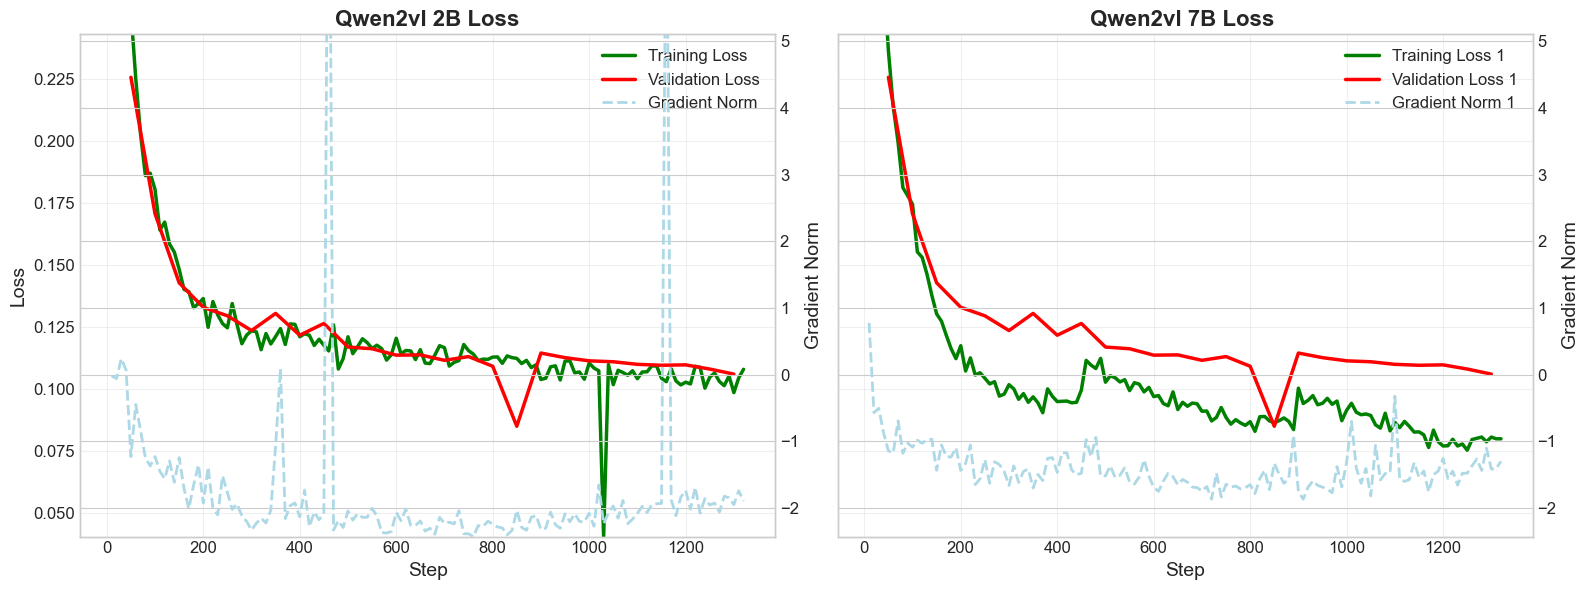

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')

# Calculate shared y-axis limits
y_max = 0.1 * max(train_loss['loss'].max(), train_loss1['loss'].max())
y_min = min(train_loss['loss'].min(), train_loss1['loss'].min())

# Calculate gradient norm y-limits (for syncing right y-axis)
g_min = min(np.log(train_loss['grad_norm']).min(), np.log(train_loss1['grad_norm']).min())
g_max = 0.5*max(np.log(train_loss['grad_norm']).max(), np.log(train_loss1['grad_norm']).max())

# Create side-by-side plots with shared left y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# ---------- First Plot ----------
ax1.plot(train_loss.index, train_loss['loss'], color='green', linewidth=2.5, label='Training Loss')
ax1.plot(val_loss.index, val_loss['eval_loss'], color='red', linewidth=2.5, label='Validation Loss')
ax1.set_xlabel('Step', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14)
ax1.set_title('Qwen2vl 2B Loss', fontsize=16, fontweight='bold')
ax1.set_ylim(y_min, y_max)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(alpha=0.3)

# Right y-axis
ax1_twin = ax1.twinx()
ax1_twin.plot(train_loss.index, np.log(train_loss['grad_norm']), color='lightblue', linewidth=2, linestyle='--', label='Gradient Norm')
ax1_twin.set_ylabel('Gradient Norm', fontsize=14)
ax1_twin.tick_params(axis='y', labelsize=12)
ax1_twin.set_ylim(g_min, g_max)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=12, loc='upper right')

# ---------- Second Plot ----------
ax2.plot(train_loss1.index, train_loss1['loss'], color='green', linewidth=2.5, label='Training Loss 1')
ax2.plot(val_loss1.index, val_loss1['eval_loss'], color='red', linewidth=2.5, label='Validation Loss 1')
ax2.set_xlabel('Step', fontsize=14)
ax2.set_title('Qwen2vl 7B Loss ', fontsize=16, fontweight='bold')
ax2.set_ylim(y_min, y_max)
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(alpha=0.3)

# Right y-axis
ax2_twin = ax2.twinx()
ax2_twin.plot(train_loss1.index, np.log(train_loss1['grad_norm']), color='lightblue', linewidth=2, linestyle='--', label='Gradient Norm 1')
ax2_twin.set_ylabel('Gradient Norm', fontsize=14)
ax2_twin.tick_params(axis='y', labelsize=12)
ax2_twin.set_ylim(g_min, g_max)

# Combine legends
lines3, labels3 = ax2.get_legend_handles_labels()
lines4, labels4 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines3 + lines4, labels3 + labels4, fontsize=12, loc='upper right')

# Final layout
fig.tight_layout()
plt.show()

